<a href="https://colab.research.google.com/github/mazenhhhh/RPS_IA/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cdasdsdfadghabgdiashfkjashfisahf

In [ ]:
!pip install tensorflow==2.15
from IPython import get_ipython
from IPython.display import display, Javascript, Image, clear_output
from base64 import b64decode
from google.colab.output import eval_js
from PIL import Image, ImageOps, ImageFilter
from keras.models import load_model
import numpy as np
import ipywidgets as widgets
import random

clear_output(wait=True)

# Define take_photo within this cell to make it accessible
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Make Keras model with https://teachablemachine.withgoogle.com/train/image

model = load_model('keras_model.h5', safe_mode=False)

def load_image():

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  # Replace this with the path to your image
  image = Image.open(take_photo()) # Now take_photo is accessible
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  print(prediction)
  return np.argmax(prediction)

Game Begin, Round of 3, Rock, Paper, Scissors, says...



<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
[[9.9999702e-01 2.4463352e-06 4.5052460e-07]]


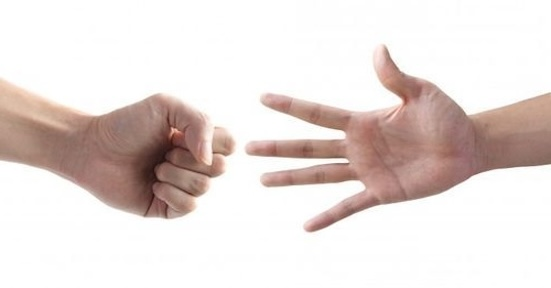

You chose Rock
The computer chose Paper
You lost round 1



<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
[[3.9686545e-04 7.1095765e-02 9.2850733e-01]]


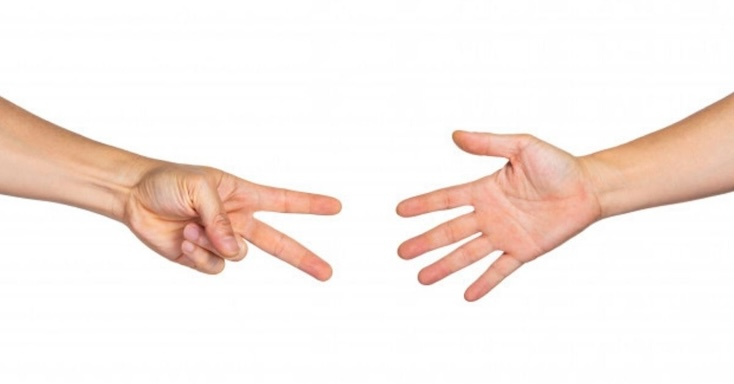

You chose Scissors
The computer chose Paper
You win round 2



<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
[[0.0007396  0.32823807 0.6710223 ]]


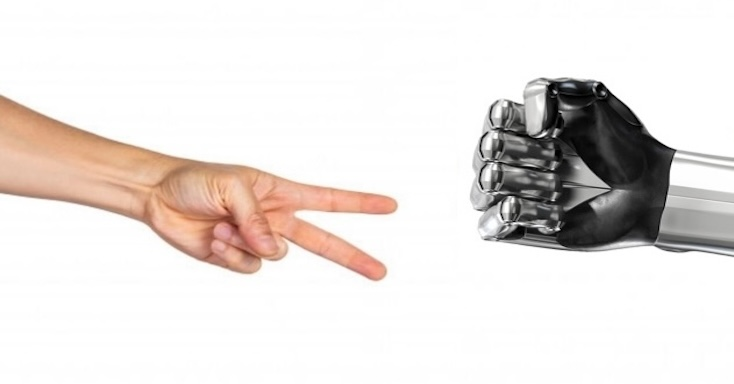

You chose Scissors
The computer chose Rock
You lost round 3

Boo, you lost 1-2, Nice try.


Button(description='Play Again', style=ButtonStyle())

In [ ]:
print("Testing to see if webcam works... Please take one photo")
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

def RPS():
  clear_output(wait=True)
  print("Game Begin, Round of 3, Rock, Paper, Scissors, says...\n")
  player = 0
  bot = 0
  rounds = 0
  while rounds < 3:

    if player == 2 or bot == 2:
      break

    #2.) Setup of rounds
    s = load_image()
    rps = random.choice([0, 1, 2])

    #3.) Tie condition
    if s == rps:
      if rps == 0:
        rock_img = Image.open("rock-rock.jpg")
        display(rock_img)
        print ("You both chose Rock")
      if rps == 1:
        paper_img = Image.open("paper-paper.jpg")
        display(paper_img)
        print ("You both chose Paper")
      if rps == 2:
        scissors_img = Image.open("scissors-scissors.jpg")
        display(scissors_img)
        print ("You both chose Scissors")
      print("Tie. Try again\n")

    #4.) Win conditions
    if rps == 0 and s == 1:
      rounds += 1
      rock_img = Image.open("paper-rock.jpg")
      display(rock_img)
      print ("You chose Paper")
      print ("The computer chose Rock")
      print("You win round " + str(rounds) + "\n")
      player += 1
    if rps == 2 and s == 0:
      rounds += 1
      scissors_img = Image.open("rock-scissors.jpg")
      display(scissors_img)
      print ("You chose Rock")
      print ("The computer chose Scissors")
      print("You win round " + str(rounds) + "\n")
      player += 1
    if rps == 1 and s == 2:
      rounds += 1
      paper_img = Image.open("scissors-paper.jpg")
      display(paper_img)
      print ("You chose Scissors")
      print ("The computer chose Paper")
      print("You win round " + str(rounds) + "\n")
      player += 1

    #5.)Lose conditions
    if rps == 1 and s == 0:
      rounds += 1
      paper_img = Image.open("rock-paper.jpg")
      display(paper_img)
      print ("You chose Rock")
      print ("The computer chose Paper")
      print("You lost round " + str(rounds) + "\n")
      bot += 1
    if rps == 0 and s == 2:
      rounds += 1
      rock_img = Image.open("scissors-rock.jpg")
      display(rock_img)
      print ("You chose Scissors")
      print ("The computer chose Rock")
      print("You lost round " + str(rounds) + "\n")
      bot += 1
    if rps == 2 and s == 1:
      rounds += 1
      scissors_img = Image.open("paper-scissors.jpg")
      display(scissors_img)
      print ("You chose Paper")
      print ("The computer chose Scissors")
      print("You lost round " + str(rounds) + "\n")
      bot += 1

  #Final results
  if player == 2 and bot == 1:
    print("Congrats! You won 2-1, Nice job!")

  if bot == 2 and player == 1:
    print("Boo, you lost 1-2, Nice try.")

  if player == 2 and bot == 0:
      print("Congrats! You won 2 out of 3 rounds, Nice job!")

  if bot == 2 and player == 0:
    print("Boo, the bot won 2 out of 3 rounds, Nice try.")

def play(b):
  RPS()
  display(button)

RPS()
button = widgets.Button(description="Play Again")
button.on_click(play)
display(button)